In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy import table
from astropy import units as u
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [2]:
cd /orange/adamginsburg/jwst/brick/catalogs

/orange/adamginsburg/jwst/brick/catalogs


In [3]:
import glob

In [4]:
ignored_columns = ['sky_bbox_ll',
 'sky_bbox_ul',
 'sky_bbox_lr',
 'sky_bbox_ur']

In [14]:
basetable = Table.read('jw02221-o001_t001_nircam_clear-f410m_cat.ecsv')
basecrds = basetable['sky_centroid']
for colname in basetable.colnames:
    basetable.rename_column(colname, colname+"_f410m")
basetable = basetable[[cn for cn in basetable.colnames if not any(x in cn for x in ignored_columns)]]

for fn in glob.glob("jw02221*nircam*.ecsv"):
    print(fn)
    if 'f410m' in fn:
        continue
    tbl = Table.read(fn)
    tbl = tbl[[cn for cn in tbl.colnames if not any(x in cn for x in ignored_columns)]]
    crds = tbl['sky_centroid']
    wl = fn.split("_")[3] if 'miri' in fn else fn.split("_")[3]
    assert wl[0] == 'f'
    matches, sep, _ = basecrds.match_to_catalog_sky(crds, nthneighbor=1)
    basetable.add_column(name=f"sep_{wl}", col=sep)
    basetable.add_column(name=f"id_{wl}", col=matches)
    matchtb = tbl[matches]
    for cn in matchtb.colnames:
        #matchtb[cn][sep > 0.1*u.arcsec].mask = True
        matchtb.rename_column(cn, f"{cn}_{wl}")
    basetable = table.hstack([basetable, matchtb], join_type='exact')
    #if 'sky_centroid_f444w' in basetable.colnames:
    #    basetable.rename_column('sky_centroid_f444w', 'sky_centroid')
    #basetable = table.join(basetable, tbl,
    #                      table_names=['', wl],
    #                      join_type='outer',
    #                      join_funcs={'sky_centroid': table.join_skycoord(0.1*u.arcsec)})
    #if 'sky_centroid_' in basetable.colnames:
    #    basetable.rename_column('sky_centroid_', 'sky_centroid_f444w')
    basetable.write("photometry_tables_merged.ecsv", overwrite=True)

jw02221-o001_t001_nircam_f405n-f444w_cat.ecsv
jw02221-o001_t001_nircam_clear-f410m_cat.ecsv
jw02221-o001_t001_nircam_f444w-f466n_cat.ecsv


In [15]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
import numpy as np

In [16]:
basetable[:5]

label_f410m,xcentroid_f410m,ycentroid_f410m,sky_centroid_f410m,aper_bkg_flux_f410m,aper_bkg_flux_err_f410m,aper30_flux_f410m,aper30_flux_err_f410m,aper50_flux_f410m,aper50_flux_err_f410m,aper70_flux_f410m,aper70_flux_err_f410m,aper_total_flux_f410m,aper_total_flux_err_f410m,aper30_abmag_f410m,aper30_abmag_err_f410m,aper50_abmag_f410m,aper50_abmag_err_f410m,aper70_abmag_f410m,aper70_abmag_err_f410m,aper_total_abmag_f410m,aper_total_abmag_err_f410m,aper30_vegamag_f410m,aper30_vegamag_err_f410m,aper50_vegamag_f410m,aper50_vegamag_err_f410m,aper70_vegamag_f410m,aper70_vegamag_err_f410m,aper_total_vegamag_f410m,aper_total_vegamag_err_f410m,CI_50_30_f410m,CI_70_50_f410m,CI_70_30_f410m,is_extended_f410m,sharpness_f410m,roundness_f410m,nn_label_f410m,nn_dist_f410m,isophotal_flux_f410m,isophotal_flux_err_f410m,isophotal_abmag_f410m,isophotal_abmag_err_f410m,isophotal_vegamag_f410m,isophotal_vegamag_err_f410m,isophotal_area_f410m,semimajor_sigma_f410m,semiminor_sigma_f410m,ellipticity_f410m,orientation_f410m,sky_orientation_f410m,sep_f405n-f444w,id_f405n-f444w,label_f405n-f444w,xcentroid_f405n-f444w,ycentroid_f405n-f444w,sky_centroid_f405n-f444w,aper_bkg_flux_f405n-f444w,aper_bkg_flux_err_f405n-f444w,aper30_flux_f405n-f444w,aper30_flux_err_f405n-f444w,aper50_flux_f405n-f444w,aper50_flux_err_f405n-f444w,aper70_flux_f405n-f444w,aper70_flux_err_f405n-f444w,aper_total_flux_f405n-f444w,aper_total_flux_err_f405n-f444w,aper30_abmag_f405n-f444w,aper30_abmag_err_f405n-f444w,aper50_abmag_f405n-f444w,aper50_abmag_err_f405n-f444w,aper70_abmag_f405n-f444w,aper70_abmag_err_f405n-f444w,aper_total_abmag_f405n-f444w,aper_total_abmag_err_f405n-f444w,aper30_vegamag_f405n-f444w,aper30_vegamag_err_f405n-f444w,aper50_vegamag_f405n-f444w,aper50_vegamag_err_f405n-f444w,aper70_vegamag_f405n-f444w,aper70_vegamag_err_f405n-f444w,aper_total_vegamag_f405n-f444w,aper_total_vegamag_err_f405n-f444w,CI_50_30_f405n-f444w,CI_70_50_f405n-f444w,CI_70_30_f405n-f444w,is_extended_f405n-f444w,sharpness_f405n-f444w,roundness_f405n-f444w,nn_label_f405n-f444w,nn_dist_f405n-f444w,isophotal_flux_f405n-f444w,isophotal_flux_err_f405n-f444w,isophotal_abmag_f405n-f444w,isophotal_abmag_err_f405n-f444w,isophotal_vegamag_f405n-f444w,isophotal_vegamag_err_f405n-f444w,isophotal_area_f405n-f444w,semimajor_sigma_f405n-f444w,semiminor_sigma_f405n-f444w,ellipticity_f405n-f444w,orientation_f405n-f444w,sky_orientation_f405n-f444w,sep_f444w-f466n,id_f444w-f466n,label_f444w-f466n,xcentroid_f444w-f466n,ycentroid_f444w-f466n,sky_centroid_f444w-f466n,aper_bkg_flux_f444w-f466n,aper_bkg_flux_err_f444w-f466n,aper30_flux_f444w-f466n,aper30_flux_err_f444w-f466n,aper50_flux_f444w-f466n,aper50_flux_err_f444w-f466n,aper70_flux_f444w-f466n,aper70_flux_err_f444w-f466n,aper_total_flux_f444w-f466n,aper_total_flux_err_f444w-f466n,aper30_abmag_f444w-f466n,aper30_abmag_err_f444w-f466n,aper50_abmag_f444w-f466n,aper50_abmag_err_f444w-f466n,aper70_abmag_f444w-f466n,aper70_abmag_err_f444w-f466n,aper_total_abmag_f444w-f466n,aper_total_abmag_err_f444w-f466n,aper30_vegamag_f444w-f466n,aper30_vegamag_err_f444w-f466n,aper50_vegamag_f444w-f466n,aper50_vegamag_err_f444w-f466n,aper70_vegamag_f444w-f466n,aper70_vegamag_err_f444w-f466n,aper_total_vegamag_f444w-f466n,aper_total_vegamag_err_f444w-f466n,CI_50_30_f444w-f466n,CI_70_50_f444w-f466n,CI_70_30_f444w-f466n,is_extended_f444w-f466n,sharpness_f444w-f466n,roundness_f444w-f466n,nn_label_f444w-f466n,nn_dist_f444w-f466n,isophotal_flux_f444w-f466n,isophotal_flux_err_f444w-f466n,isophotal_abmag_f444w-f466n,isophotal_abmag_err_f444w-f466n,isophotal_vegamag_f444w-f466n,isophotal_vegamag_err_f444w-f466n,isophotal_area_f444w-f466n,semimajor_sigma_f444w-f466n,semiminor_sigma_f444w-f466n,ellipticity_f444w-f466n,orientation_f444w-f466n,sky_orientation_f444w-f466n
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,deg,,,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,deg,,,,,"deg,deg",Jy,

Text(0.5, 0, 'Separation from f410m')

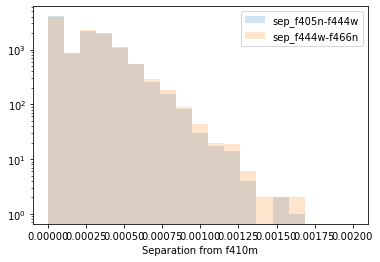

In [18]:
pl.figure(facecolor='w')
for cn in basetable.colnames:
    if 'sep' in cn:
        pl.hist(basetable[cn],
                label=cn,
                bins=np.linspace(0.0, 0.002, 20),
                alpha=0.2, log=True)
pl.legend(loc='best')
pl.xlabel('Separation from f410m')


In [22]:
[key for key in basetable.colnames if 'aper30' in key]

['aper30_flux_f410m',
 'aper30_flux_err_f410m',
 'aper30_abmag_f410m',
 'aper30_abmag_err_f410m',
 'aper30_vegamag_f410m',
 'aper30_vegamag_err_f410m',
 'aper30_flux_f405n-f444w',
 'aper30_flux_err_f405n-f444w',
 'aper30_abmag_f405n-f444w',
 'aper30_abmag_err_f405n-f444w',
 'aper30_vegamag_f405n-f444w',
 'aper30_vegamag_err_f405n-f444w',
 'aper30_flux_f444w-f466n',
 'aper30_flux_err_f444w-f466n',
 'aper30_abmag_f444w-f466n',
 'aper30_abmag_err_f444w-f466n',
 'aper30_vegamag_f444w-f466n',
 'aper30_vegamag_err_f444w-f466n']

In [56]:
bad_shapes = (basetable['sharpness_f410m'] > 0.65) | (basetable['sharpness_f410m'] < 0.50)

In [36]:
not_extended = (~basetable['is_extended_f410m'] & ~basetable['is_extended_f405n-f444w'] & ~basetable['is_extended_f444w-f466n'])

Text(0, 0.5, 'F410m')

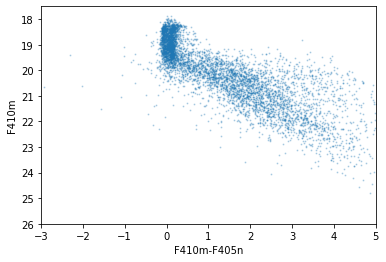

In [38]:
in_r0 = True # r0.contains(basetable['sky_centroid_f444w'], wcs=ww)
in_r1 = True # r1.contains(basetable['sky_centroid_f444w'], wcs=ww)
noextsel = True # noext.contains(basetable['sky_centroid_f444w'], wcs=ww)
pl.scatter((basetable['aper30_abmag_f410m']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes],
            basetable['aper30_abmag_f410m'][not_extended & ~bad_shapes], 
          s=1, alpha=0.25)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[noextsel],
#           basetable['aper30_abmag_f444w'][noextsel], 
#          s=1, alpha=0.25, c='maroon')
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r0],
#           basetable['aper30_abmag_f444w'][in_r0], 
#          s=2, alpha=0.9)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r1],
#           basetable['aper30_abmag_f444w'][in_r1], 
#          s=2, alpha=0.9, c='k')

pl.axis([-3,5,26,17.5])
pl.xlabel("F410m-F405n")
pl.ylabel("F410m")

Text(0, 0.5, 'F466n')

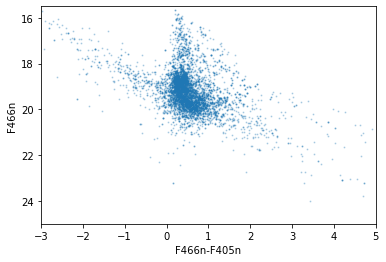

In [39]:
in_r0 = True # r0.contains(basetable['sky_centroid_f444w'], wcs=ww)
in_r1 = True # r1.contains(basetable['sky_centroid_f444w'], wcs=ww)
noextsel = True # noext.contains(basetable['sky_centroid_f444w'], wcs=ww)
pl.scatter((basetable['aper30_abmag_f444w-f466n']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes],
           basetable['aper30_abmag_f444w-f466n'][not_extended & ~bad_shapes], 
          s=1, alpha=0.25)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[noextsel],
#           basetable['aper30_abmag_f444w'][noextsel], 
#          s=1, alpha=0.25, c='maroon')
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r0],
#           basetable['aper30_abmag_f444w'][in_r0], 
#          s=2, alpha=0.9)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r1],
#           basetable['aper30_abmag_f444w'][in_r1], 
#          s=2, alpha=0.9, c='k')

pl.axis([-3,5,25,15.5])
pl.xlabel("F466n-F405n")
pl.ylabel("F466n")

Text(0, 0.5, 'F466n-F410m')

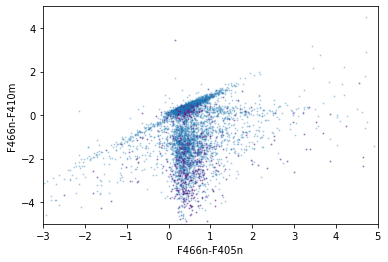

In [57]:
in_r0 = True # r0.contains(basetable['sky_centroid_f444w'], wcs=ww)
in_r1 = True # r1.contains(basetable['sky_centroid_f444w'], wcs=ww)
noextsel = True # noext.contains(basetable['sky_centroid_f444w'], wcs=ww)
pl.scatter((basetable['aper30_abmag_f444w-f466n']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes],
          (basetable['aper30_abmag_f444w-f466n']-basetable['aper30_abmag_f410m'])[not_extended & ~bad_shapes], 
          s=1, alpha=0.25)
elliptical = basetable['ellipticity_f410m'] > 0.45
pl.scatter((basetable['aper30_abmag_f444w-f466n']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes & elliptical],
          (basetable['aper30_abmag_f444w-f466n']-basetable['aper30_abmag_f410m'])[not_extended & ~bad_shapes & elliptical], 
          s=1, alpha=0.25, c='purple')
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[noextsel],
#           basetable['aper30_abmag_f444w'][noextsel], 
#          s=1, alpha=0.25, c='maroon')
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r0],
#           basetable['aper30_abmag_f444w'][in_r0], 
#          s=2, alpha=0.9)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r1],
#           basetable['aper30_abmag_f444w'][in_r1], 
#          s=2, alpha=0.9, c='k')

pl.axis([-3,5,-5,5])
pl.xlabel("F466n-F405n")
pl.ylabel("F466n-F410m")

# try to figure out what's going bad with the really really red stuff

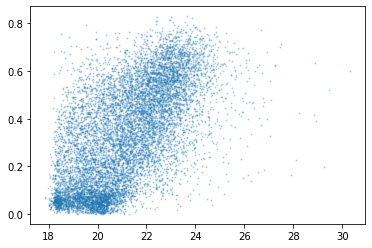

In [49]:
pl.scatter(basetable['aper30_abmag_f410m'], basetable['ellipticity_f410m'], s=1, alpha=0.25)

(0.0, 1.0)

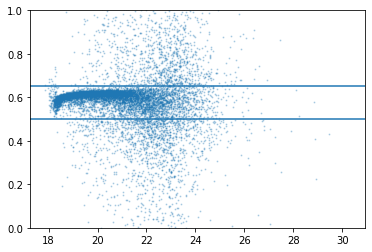

In [54]:
pl.scatter(basetable['aper30_abmag_f410m'], basetable['sharpness_f410m'], s=1, alpha=0.25)
pl.axhline(0.65)
pl.axhline(0.5)
pl.ylim(0,1)

In [55]:
bad_shapes = (basetable['sharpness_f410m'] > 0.65) | (basetable['sharpness_f410m'] < 0.50)

In [63]:
import regions
from astropy.io import fits

In [65]:
fh = fits.open('../images/jw02221-o001_t001_nircam_clear-f410m_i2d.fits')

In [73]:
reg, = regions.Regions.read('../cluster_square.reg')

In [66]:
ww = wcs.WCS(fh[1].header)

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(0, 0.5, 'F410m')

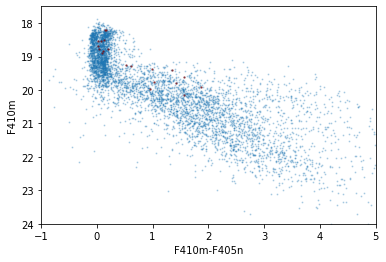

In [74]:
in_cl = reg.contains(basetable['sky_centroid_f410m'], wcs=ww)

pl.scatter((basetable['aper30_abmag_f410m']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes],
            basetable['aper30_abmag_f410m'][not_extended & ~bad_shapes], 
          s=1, alpha=0.25)
pl.scatter((basetable['aper30_abmag_f410m']-basetable['aper30_abmag_f405n-f444w'])[not_extended & ~bad_shapes & in_cl],
           basetable['aper30_abmag_f410m'][not_extended & ~bad_shapes & in_cl], 
          s=2, alpha=0.5, c='maroon')
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r0],
#           basetable['aper30_abmag_f444w'][in_r0], 
#          s=2, alpha=0.9)
#pl.scatter((basetable['aper30_abmag_f444w']-basetable['aper30_abmag_f335m'])[in_r1],
#           basetable['aper30_abmag_f444w'][in_r1], 
#          s=2, alpha=0.9, c='k')

pl.axis([-1,5,24,17.5])
pl.xlabel("F410m-F405n")
pl.ylabel("F410m")

In [76]:
preg = reg.to_pixel(ww)
mask = preg.to_mask()
cutout = mask.cutout(fh[1].data)

In [83]:
slcs,_ = mask.bbox.get_overlap_slices(fh[1].data.shape)

In [87]:
from astropy.visualization import simple_norm

In [91]:
crds = basetable['sky_centroid_f410m']

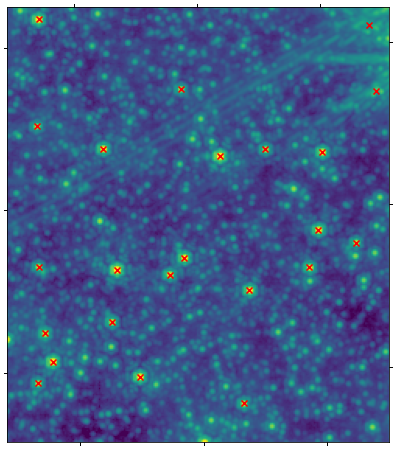

In [93]:
pl.figure(figsize=(8,8))
ax = pl.subplot(projection=ww[slcs])
pl.imshow(cutout, norm=simple_norm(cutout, stretch='log', min_percent=0.1, max_percent=99.9))
pl.scatter(crds.ra[in_cl], crds.dec[in_cl], color='r', marker='x', transform=ax.get_transform('world'))